In [1]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.abspath('..'))
from src.feature_reduction import FeatureReducer

%matplotlib inline

## 2. Load Processed Data
We load the `X_train` and `X_test` files generated in the previous phase.

In [2]:
PROCESSED_DIR = '../data/processed'

X_train = pd.read_csv(f'{PROCESSED_DIR}/X_train.csv', index_col=0)
X_test = pd.read_csv(f'{PROCESSED_DIR}/X_test.csv', index_col=0)

print(f"Loaded Train Data: {X_train.shape}")
print(f"Loaded Test Data: {X_test.shape}")

Loaded Train Data: (147, 990)
Loaded Test Data: (37, 990)


## 3. Apply PCA
We will attempt to keep 95% of the total variance in the dataset.
The PCA is fitted on the **Training Set** only.

In [3]:
# Initialize reducer to keep 95% variance
reducer = FeatureReducer(n_components=0.95)

# Fit and Transform
X_train_pca = reducer.fit_transform(X_train)
X_test_pca = reducer.transform(X_test)

print(f"Original Feature Count: {X_train.shape[1]}")
print(f"Reduced Feature Count (95% variance): {X_train_pca.shape[1]}")

Fitting PCA on train set with shape (147, 990)...
PCA reduced to 131 components.
Original Feature Count: 990
Reduced Feature Count (95% variance): 131


## 4. Visualize Variance (Scree Plot)
Visualizing how much information is retained as we add more components.

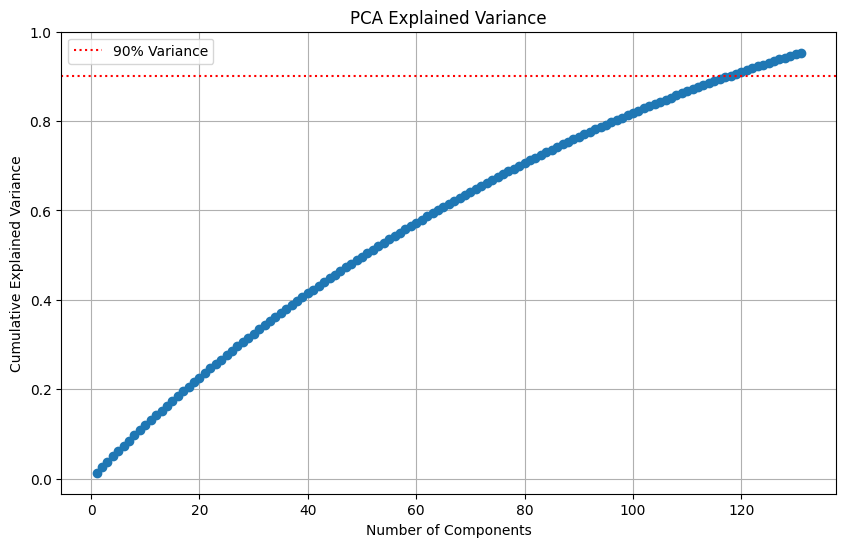

In [4]:
reducer.plot_explained_variance()

## 5. Discussion: Interpretation vs. Performance
While PCA improves computational efficiency and reduces noise, we lose the direct mapping to single genes (e.g., "Gene A is important" becomes "PC1 is important, which is a mix of Gene A, B, and C").

For our Model Development phase, we will save these PCA features to compare against the original gene features.

In [5]:
X_train_pca.to_csv(f'{PROCESSED_DIR}/X_train_pca.csv')
X_test_pca.to_csv(f'{PROCESSED_DIR}/X_test_pca.csv')

print("PCA features saved.")

PCA features saved.
